In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Let's load the dataset TVS_Loan_Default

In [3]:
tvs_credit_default= pd.read_csv("../datasets/two_wheelr_tvs.csv")
tvs_credit_default.head()

,CustomerID,Bounced_1,Bounced_count,MOB_tvs,Bounced_count_repaying,EMI,Loan_Amount,Tenure,Dealer_code_two_wheeler,Product_code_two_wheeler,No_advanced_emi_paid,Rate_intrest,Gender,Employability_type,Resident_type,DOB,Age,No_loans,No_secured_loan,No_unsecured_loan,Max_amnt_live_loans,no_new_loans_3_months,live_loan_amnt_sanctioned_secure,live_loan_amnt_sanctioned_unsecure,Max_amnt_sanctioned_two_wheeler_loan,time_since_last_loan,time_since_last_consumerable_loan_taken,Number of times 30 days past due in last 6 months,Number of times 60 days past due in last 6 months,Number of times 90 days past due in last 6 months,Tier,TARGET
0,1.0,0.0,0.0,24,0,2432,46500,24,1385,SC,0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40,1.0,1.0,0.0,?,0.0,?,?,46500,?,?,0.0,0.0,0.0,'TIER 1',0.0
1,2.0,0.0,1.0,24,1,1495,28168,24,2496,MO,0,13.65,MALE,SELF,RENT,01-09-1967,47,1.0,1.0,0.0,?,0.0,?,?,28168,?,?,0.0,0.0,0.0,'TIER 1',0.0
2,3.0,0.0,0.0,26,0,1707,38900,30,1346,SC,0,12.65,MALE,SELF,RENT,04-05-1983,31,9.0,6.0,3.0,55000,0.0,?,105000,38900,34,31,31.0,31.0,16.0,'TIER 1',0.0
3,4.0,0.0,0.0,24,0,2128,42900,24,1375,SC,2,9.5,FEMALE,SAL,RENT,10-12-1989,24,1.0,1.0,0.0,?,0.0,?,?,42900,?,?,0.0,0.0,0.0,'TIER 1',0.0
4,5.0,0.0,0.0,27,0,1824,40900,30,4140,MC,0,13.5,MALE,SAL,RENT,24-09-1984,30,1.0,1.0,0.0,?,0.0,?,?,40900,?,?,0.0,0.0,0.0,'TIER 1',0.0


### Exploring the dataset

In [4]:
tvs_credit_default.isnull().sum()

CustomerID                                           34
Bounced_1                                            34
Bounced_count                                        34
MOB_tvs                                              34
Bounced_count_repaying                               34
EMI                                                  34
 Loan_Amount                                         34
Tenure                                               34
Dealer_code_two_wheeler                              34
Product_code_two_wheeler                             34
No_advanced_emi_paid                                 34
Rate_intrest                                         34
Gender                                               34
Employability_type                                   34
Resident_type                                        34
DOB                                                  34
Age                                                  34
No_loans                                        

In [5]:
tvs_credit_default.describe()

,CustomerID,Bounced_1,Bounced_count,No_loans,No_secured_loan,No_unsecured_loan,no_new_loans_3_months,Number of times 30 days past due in last 6 months,Number of times 60 days past due in last 6 months,Number of times 90 days past due in last 6 months,TARGET
count,119528.000000,119528.000000,119528.000000,119528.000000,119528.000000,119528.000000,119528.0,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,3.644385,2.247883,0.909720,0.0,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,6.989012,5.387067,2.476597,0.0,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,4.000000,2.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,555.000000,523.000000,54.000000,0.0,314.000000,243.000000,96.000000,1.000000


In [6]:
df = tvs_credit_default.drop(columns="CustomerID")

In [7]:
df.head()

,Bounced_1,Bounced_count,MOB_tvs,Bounced_count_repaying,EMI,Loan_Amount,Tenure,Dealer_code_two_wheeler,Product_code_two_wheeler,No_advanced_emi_paid,Rate_intrest,Gender,Employability_type,Resident_type,DOB,Age,No_loans,No_secured_loan,No_unsecured_loan,Max_amnt_live_loans,no_new_loans_3_months,live_loan_amnt_sanctioned_secure,live_loan_amnt_sanctioned_unsecure,Max_amnt_sanctioned_two_wheeler_loan,time_since_last_loan,time_since_last_consumerable_loan_taken,Number of times 30 days past due in last 6 months,Number of times 60 days past due in last 6 months,Number of times 90 days past due in last 6 months,Tier,TARGET
0,0.0,0.0,24,0,2432,46500,24,1385,SC,0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40,1.0,1.0,0.0,?,0.0,?,?,46500,?,?,0.0,0.0,0.0,'TIER 1',0.0
1,0.0,1.0,24,1,1495,28168,24,2496,MO,0,13.65,MALE,SELF,RENT,01-09-1967,47,1.0,1.0,0.0,?,0.0,?,?,28168,?,?,0.0,0.0,0.0,'TIER 1',0.0
2,0.0,0.0,26,0,1707,38900,30,1346,SC,0,12.65,MALE,SELF,RENT,04-05-1983,31,9.0,6.0,3.0,55000,0.0,?,105000,38900,34,31,31.0,31.0,16.0,'TIER 1',0.0
3,0.0,0.0,24,0,2128,42900,24,1375,SC,2,9.5,FEMALE,SAL,RENT,10-12-1989,24,1.0,1.0,0.0,?,0.0,?,?,42900,?,?,0.0,0.0,0.0,'TIER 1',0.0
4,0.0,0.0,27,0,1824,40900,30,4140,MC,0,13.5,MALE,SAL,RENT,24-09-1984,30,1.0,1.0,0.0,?,0.0,?,?,40900,?,?,0.0,0.0,0.0,'TIER 1',0.0


In [8]:
cols = pd.DataFrame(df.isnull().mean().round(4) * 100, columns =['precentage_missing_value']).sort_values(by=['precentage_missing_value'])
print(cols)

                                                   precentage_missing_value
Bounced_1                                                              0.03
Number of times 90 days past due in last 6 months                      0.03
Number of times 60 days past due in last 6 months                      0.03
Number of times 30 days past due in last 6 months                      0.03
time_since_last_consumerable_loan_taken                                0.03
time_since_last_loan                                                   0.03
Max_amnt_sanctioned_two_wheeler_loan                                   0.03
live_loan_amnt_sanctioned_unsecure                                     0.03
live_loan_amnt_sanctioned_secure                                       0.03
no_new_loans_3_months                                                  0.03
Max_amnt_live_loans                                                    0.03
No_unsecured_loan                                                      0.03
No_secured_l

In [9]:
df.shape

(119562, 31)

In [10]:
data = df.drop(['DOB', 'Max_amnt_live_loans', 'Max_amnt_live_loans', 'live_loan_amnt_sanctioned_unsecure', 'Max_amnt_sanctioned_two_wheeler_loan', 'time_since_last_loan', 'time_since_last_consumerable_loan_taken'], axis=1)

In [11]:
data = data[data['Resident_type'] != '']

In [12]:
data['Resident_type'] = data['Resident_type'].astype('category')

In [13]:
data = data.replace('?', 0)

In [14]:
from scipy.stats import chi2_contingency

categorical_vars = ['Product_code_two_wheeler', 'Gender', 'Employability_type', 'Resident_type', 'Tier']
significant_vars = []

for var in categorical_vars:
    contingency_table = pd.crosstab(data[var], data['TARGET'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < 0.05:
        significant_vars.append(var)

In [15]:
significant_vars

['Product_code_two_wheeler', 'Gender', 'Employability_type', 'Tier']

In [16]:
data = data.drop([var for var in categorical_vars if var not in significant_vars], axis=1)


In [17]:
data = data.drop(['no_new_loans_3_months'], axis=1)
data = data.dropna()

In [18]:
for column in ['MOB_tvs', 'Bounced_count_repaying', 'EMI', ' Loan_Amount', 'Tenure', 'No_advanced_emi_paid', 'Rate_intrest', 'Age', 'live_loan_amnt_sanctioned_secure', 'Dealer_code_two_wheeler', 'Product_code_two_wheeler', 'Gender',
       'Employability_type', 'Tier']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

### Let's start preprocessing the data 

In [19]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [20]:
index_to_remove = numerical_cols.index("TARGET")
numerical_cols.pop(index_to_remove)

'TARGET'

In [21]:
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_scaler = StandardScaler()
categorical_encoder = OneHotEncoder()

In [22]:
numerical_transformer = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', numerical_scaler)
])

categorical_transformer = Pipeline(steps=[
    ('imputer', categorical_imputer),
    ('encoder', categorical_encoder)
])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

In [24]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model = LogisticRegression()
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor), 
    ('model', model)  
])

In [26]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Bounced_1', 'Bounced_count',
                                                   'MOB_tvs',
                                                   'Bounced_count_repaying',
                                                   'EMI', ' Loan_Amount',
                                                   'Tenure',
                                                   'Dealer_code_two_wheeler',
                                                   'Product_code_two_wheeler',
                                                   'No_advanced_emi_paid',
                                                   'Rate_intrest', 'Gender',
                                                   'Employabil...
                                                   'No_secured_loan',
                                                   'No_unsecured_loan',
                                                   'live_loan_amnt_sanctioned_secure',
                                                   'Number of times 30 days '
                                                   'past due in last 6 months',
                                                   'Number of times 60 days '
                                                   'past due in last 6 months',
                                                   'Number of times 90 days '
                                                   'past due in last 6 months',
                                                   'Tier']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  [])])),
                ('model', LogisticRegression())])

In [27]:
y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[35016    42]
 [  790    11]]


In [28]:
y_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

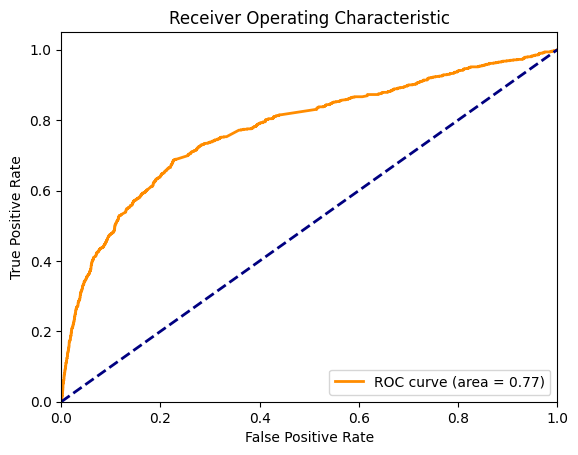

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
import os
plt.savefig(os.path.join('two_wheeler_roc_curve.png'))


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     35058
         1.0       0.21      0.01      0.03       801

    accuracy                           0.98     35859
   macro avg       0.59      0.51      0.51     35859
weighted avg       0.96      0.98      0.97     35859



In [32]:
import pickle
model_file_path = '../models/two_wheeler_loan.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(pipeline, model_file)